In [51]:
from qiskit import *
import numpy as np
import matplotlib 
from qiskit.visualization import plot_histogram, plot_error_map, plot_circuit_layout
from qiskit import IBMQ
from qiskit.providers.ibmq import least_busy
from qiskit.tools.monitor import job_monitor
from qiskit.providers.fake_provider import FakeJakarta, FakeBelem

#### Part 1

 XOR Gate
 
 Takes two binary strings as input and gives one as output.

 The output is '0' when the inputs are equal and '1' otherwise.

In [4]:
def XOR(inp1,inp2):
    """An XOR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 1.
    """
  
    qc = QuantumCircuit(2, 1) 
    qc.reset(range(2))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    # this is where your program for quantum XOR gate goes
    
    
    qc.cx(0,1)
    
    
    # barrier between input state and gate operation 
    qc.barrier()
    
    qc.measure(1,0) # output from qubit 1 is measured
  
    #We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    #Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

XOR with inputs 0 0 gives output 0


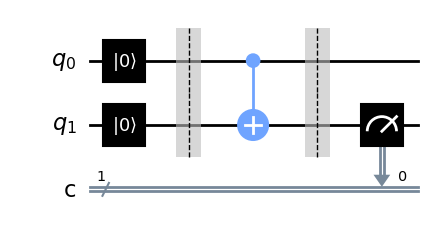



XOR with inputs 0 1 gives output 1


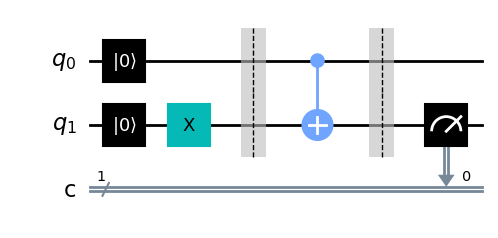



XOR with inputs 1 0 gives output 1


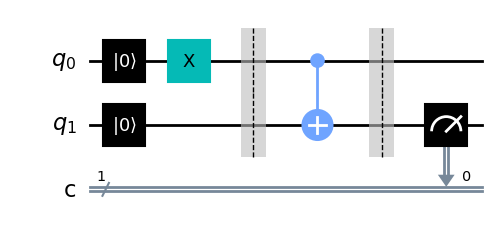



XOR with inputs 1 1 gives output 0


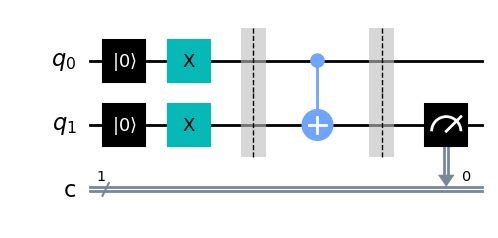

In [6]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = XOR(inp1, inp2)
        print('XOR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw('mpl'))
        print('\n')

AND Gate

Takes two binary strings as input and gives one as output.

The output is '1' only when both the inputs are '1'.

In [7]:
def AND(inp1,inp2):
    """An AND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(2))
  
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()

    # this is where your program for quantum AND gate goes

    
    qc.ccx(0,1,2)
    

    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc, shots=1, memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

AND with inputs 0 0 gives output 0


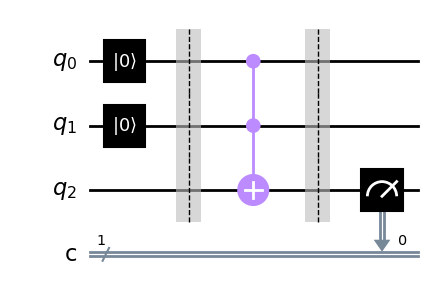



AND with inputs 0 1 gives output 0


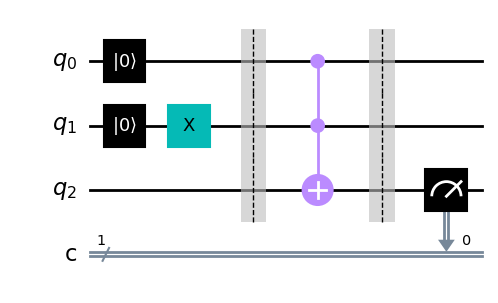



AND with inputs 1 0 gives output 0


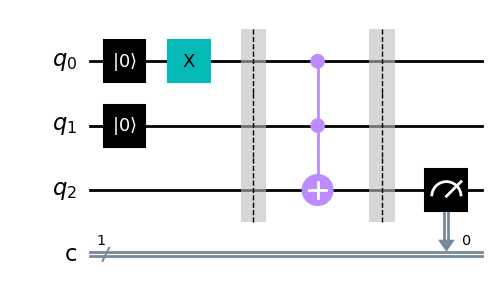



AND with inputs 1 1 gives output 1


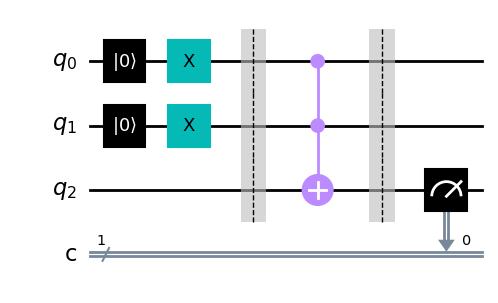

In [8]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = AND(inp1, inp2)
        print('AND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw('mpl'))
        print('\n')

NAND Gate

Takes two binary strings as input and gives one as output.

The output is '0' only when both the inputs are '1'.

In [9]:
def NAND(inp1,inp2):
    """An NAND gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output NAND circuit.
        str: Output value measured from qubit 2.
    """
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
    
    # this is where your program for quantum NAND gate goes


    qc.ccx(0,1,2)
    qc.x(2)
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

NAND with inputs 0 0 gives output 1


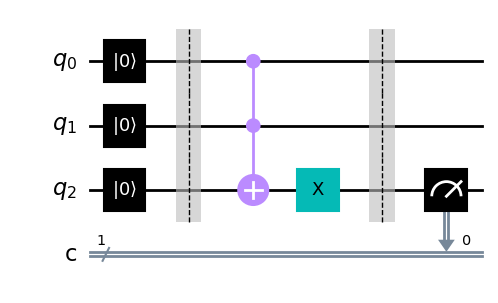



NAND with inputs 0 1 gives output 1


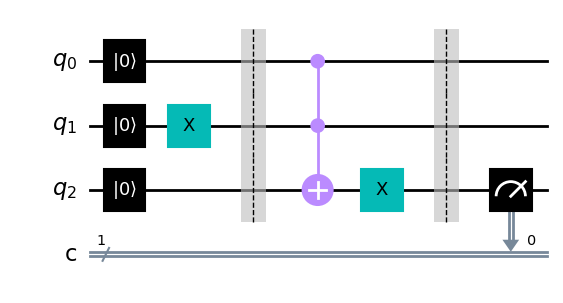



NAND with inputs 1 0 gives output 1


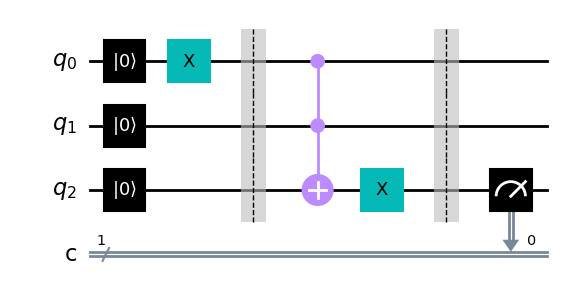



NAND with inputs 1 1 gives output 0


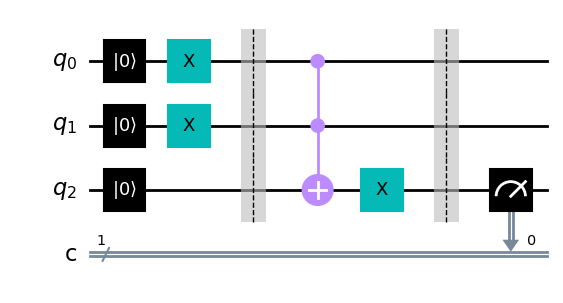

In [10]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = NAND(inp1, inp2)
        print('NAND with inputs',inp1,inp2,'gives output',output)
        display(qc.draw('mpl'))
        print('\n')

OR Gate

Takes two binary strings as input and gives one as output.

The output is '1' if either input is '1'.

In [11]:
def OR(inp1,inp2):
    """An OR gate.
    
    Parameters:
        inpt1 (str): Input 1, encoded in qubit 0.
        inpt2 (str): Input 2, encoded in qubit 1.
        
    Returns:
        QuantumCircuit: Output XOR circuit.
        str: Output value measured from qubit 2.
    """

    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    
    qc.barrier()
   
    # this is where your program for quantum OR gate goes


    qc.x([0,1])
    qc.ccx(0,1,2)
    qc.x([0,1,2])
    
    
    qc.barrier()
    qc.measure(2, 0) # output from qubit 2 is measured
  
    # We'll run the program on a simulator
    backend = Aer.get_backend('aer_simulator')
    # Since the output will be deterministic, we can use just a single shot to get it
    job = backend.run(qc,shots=1,memory=True)
    output = job.result().get_memory()[0]
  
    return qc, output

OR with inputs 0 0 gives output 0


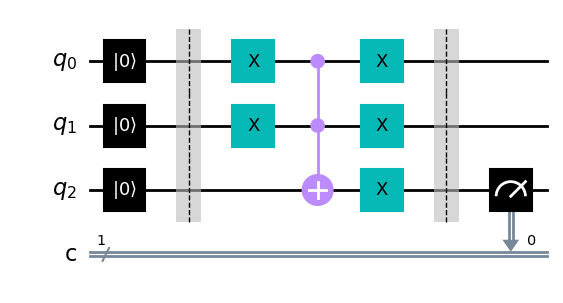



OR with inputs 0 1 gives output 1


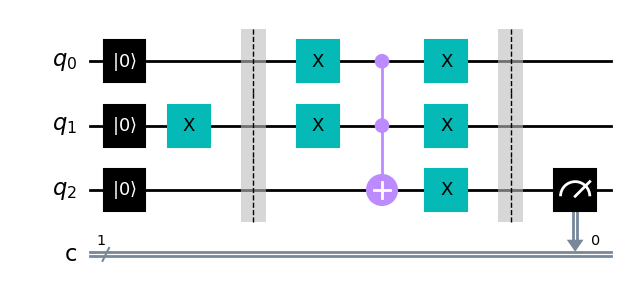



OR with inputs 1 0 gives output 1


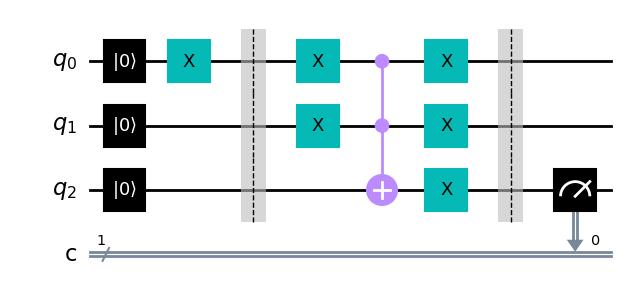



OR with inputs 1 1 gives output 1


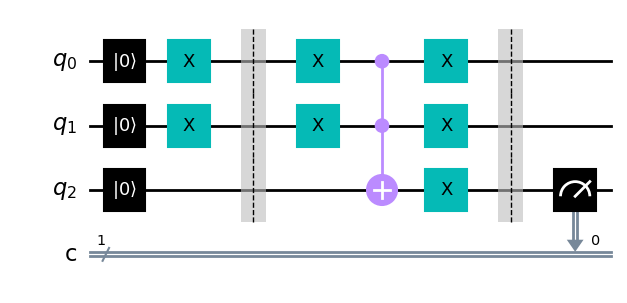

In [12]:
## Test the function
for inp1 in ['0', '1']:
    for inp2 in ['0', '1']:
        qc, output = OR(inp1, inp2)
        print('OR with inputs',inp1,inp2,'gives output',output)
        display(qc.draw('mpl'))
        print('\n')

#### Part 2

In [4]:
IBMQ.load_account()

IBMQ.providers()

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]

In [5]:
provider = IBMQ.get_provider('ibm-q')
provider.backends()

[<IBMQSimulator('ibmq_qasm_simulator') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_quito') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_statevector') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_mps') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_extended_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQSimulator('simulator_stabilizer') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibmq_manila') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_nairobi') from IBMQ(hub='ibm-q', group='open', project='main')>,
 <IBMQBackend('ibm_oslo') from IBMQ(hub='ibm-q', group='open', project='main')>]

In [7]:
backend_ex = provider.get_backend('ibmq_lima')
backend_ex

<IBMQBackend('ibmq_lima') from IBMQ(hub='ibm-q', group='open', project='main')>

In [11]:
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= 2 and 
                                        not x.configuration().simulator and x.status().operational==True))
backend

<IBMQBackend('ibmq_belem') from IBMQ(hub='ibm-q', group='open', project='main')>

AND gate


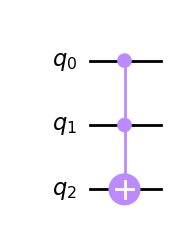



Transpiled AND gate with all the required connectivity


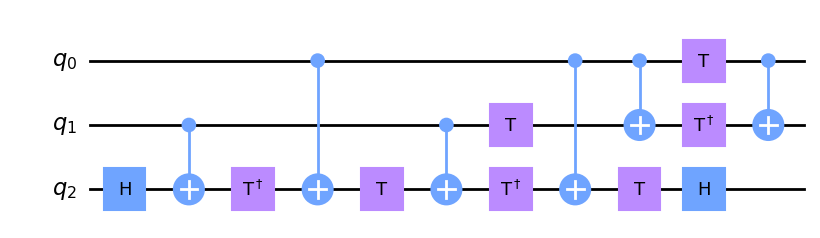

In [12]:
qc_and = QuantumCircuit(3)
qc_and.ccx(0,1,2)
print('AND gate')
display(qc_and.draw('mpl'))
print('\n\nTranspiled AND gate with all the required connectivity')
qc_and.decompose().draw('mpl')

In [14]:
def AND(inp1, inp2, backend, layout):
    
    qc = QuantumCircuit(3, 1) 
    qc.reset(range(3))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.measure(2, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

In [54]:
backend = provider.get_backend('ibmq_belem')


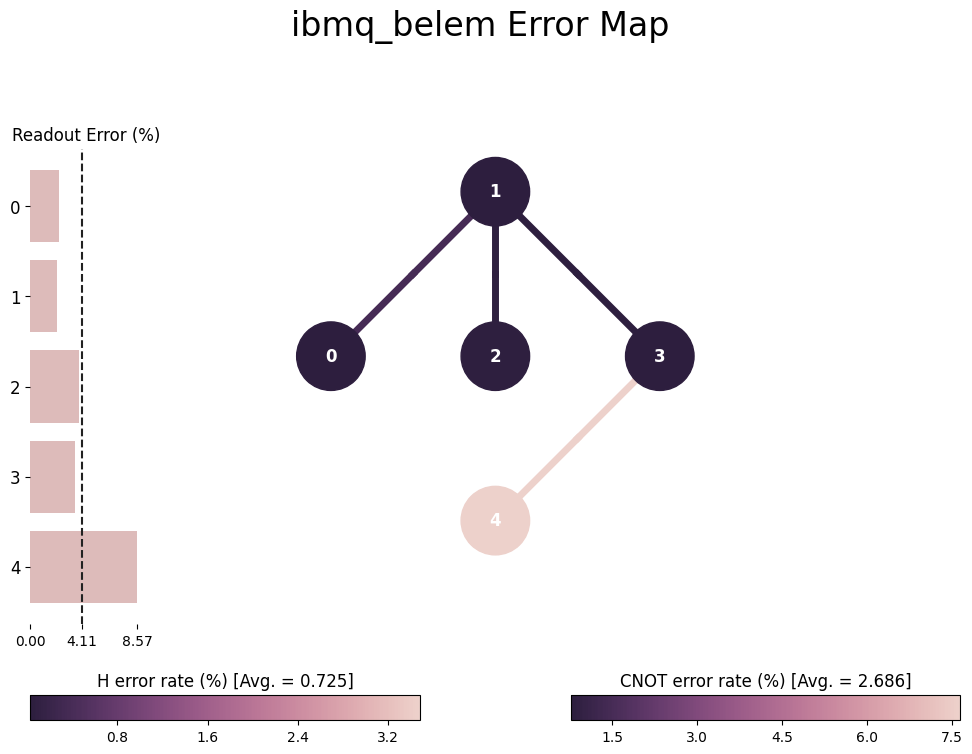

In [55]:
plot_error_map(backend)

In [23]:
layout = [0,1,3]

In [24]:
output_all = []
qc_trans_all = []
prob_all = []

worst = 1
best = 0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        qc_trans, output = AND(input1, input2, backend, layout)
        
        output_all.append(output)
        qc_trans_all.append(qc_trans)
        
        prob = output[str(int( input1=='1' and input2=='1' ))]/8192
        prob_all.append(prob)
        
        print('\nProbability of correct answer for inputs',input1,input2)
        print('{:.2f}'.format(prob) )
        print('---------------------------------')
        
        worst = min(worst,prob)
        best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities was {:.2f}'.format(best))
print('The lowest of these probabilities was {:.2f}'.format(worst))

6360662b49bfe9d6ead1af0f
Job Status: job has successfully run

Probability of correct answer for inputs 0 0
0.64
---------------------------------
6360695519ac6705fe0eadba
Job Status: job has successfully run

Probability of correct answer for inputs 0 1
0.82
---------------------------------
63606db8b0c0606203abeff5
Job Status: job has successfully run

Probability of correct answer for inputs 1 0
0.81
---------------------------------
6360783449bfe9cfb0d1af4c
Job Status: job has successfully run

Probability of correct answer for inputs 1 1
0.70
---------------------------------


The highest of these probabilities was 0.82
The lowest of these probabilities was 0.64


Transpiled AND gate circuit for ibmq_vigo with input 0 0

The circuit depth : 21
# of nonlocal gates : 15
Probability of correct answer : 0.64


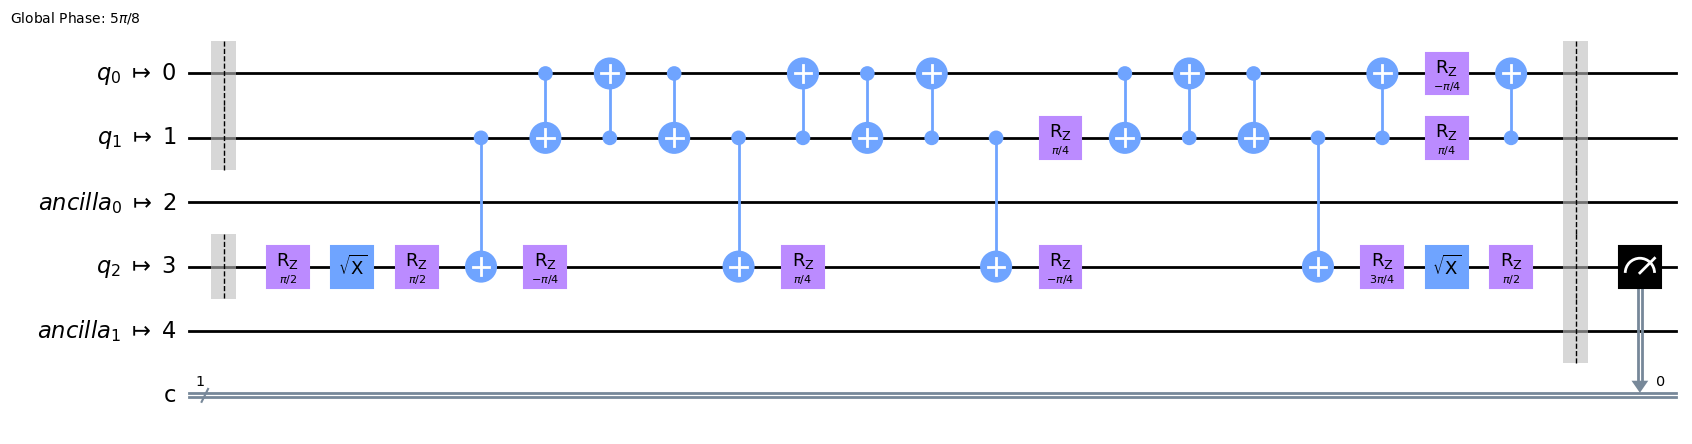

In [26]:
print('Transpiled AND gate circuit for ibmq_belem with input 0 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[0].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[0].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[0]) )
qc_trans_all[0].draw('mpl')

Transpiled AND gate circuit for ibmq_vigo with input 0 1

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.82


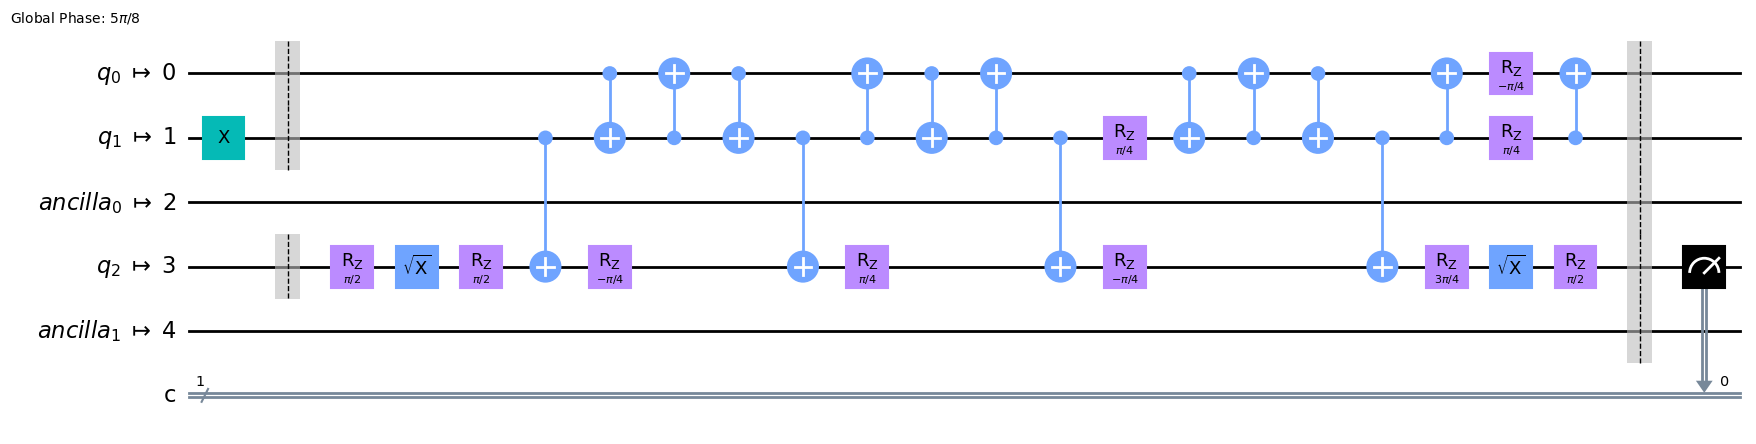

In [27]:
print('Transpiled AND gate circuit for ibmq_belem with input 0 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[1].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[1].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[1]) )
qc_trans_all[1].draw('mpl')

Transpiled AND gate circuit for ibmq_vigo with input 1 0

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.81


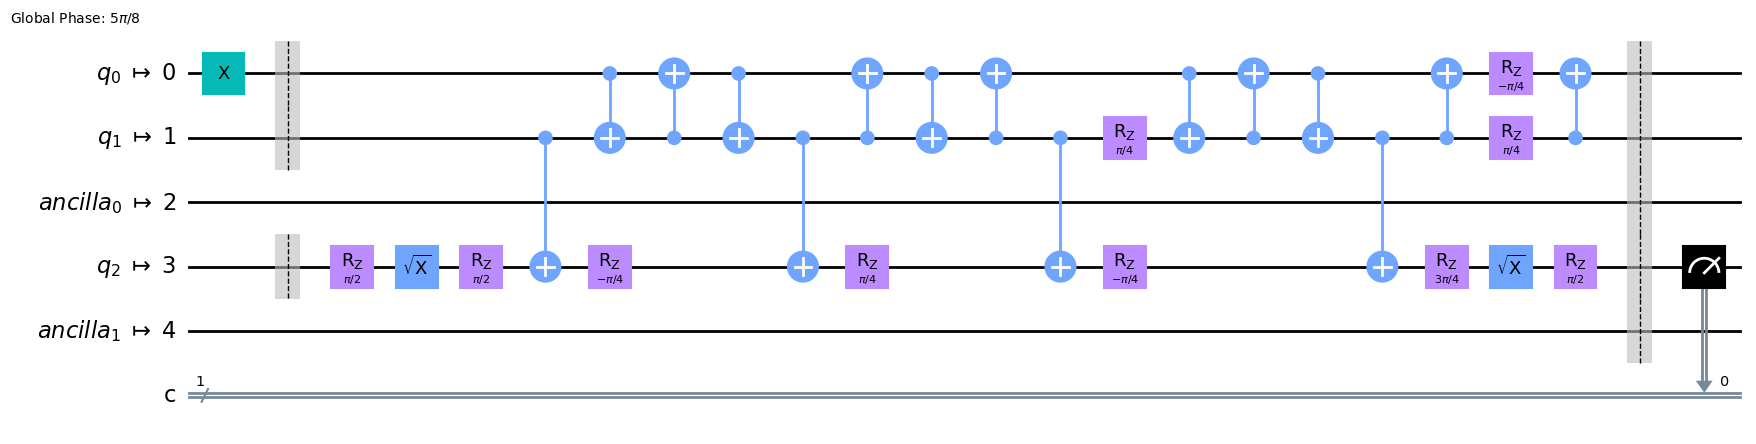

In [28]:
print('Transpiled AND gate circuit for ibmq_belem with input 1 0')
print('\nThe circuit depth : {}'.format (qc_trans_all[2].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[2].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[2]) )
qc_trans_all[2].draw('mpl')

Transpiled AND gate circuit for ibmq_vigo with input 1 1

The circuit depth : 22
# of nonlocal gates : 15
Probability of correct answer : 0.70


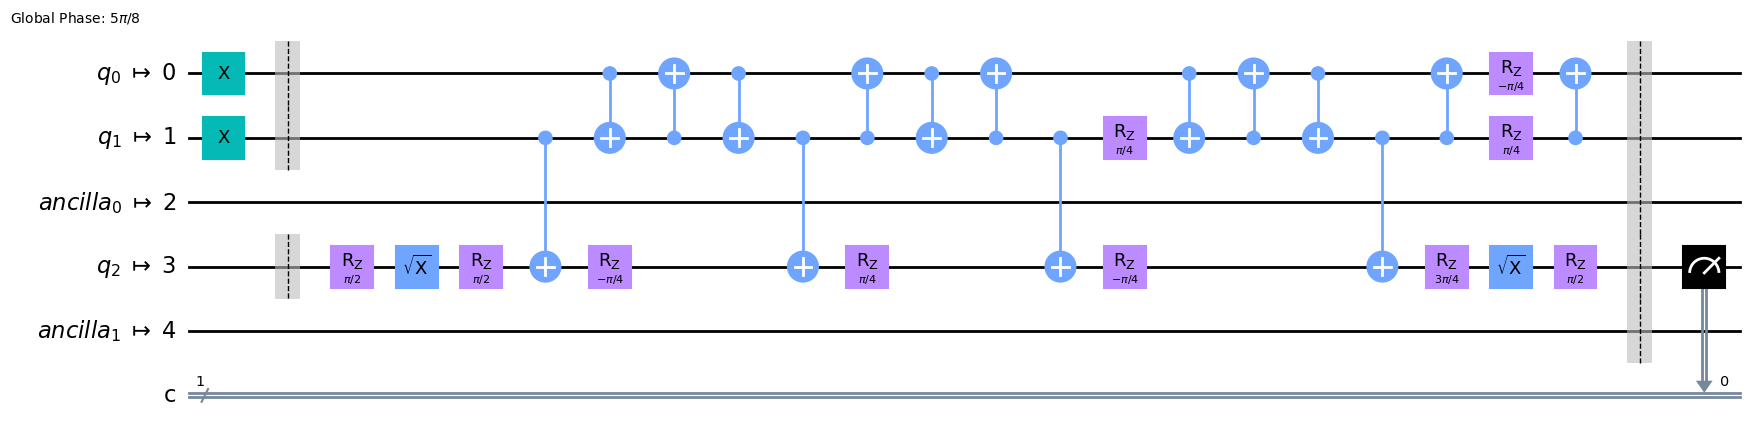

In [29]:
print('Transpiled AND gate circuit for ibmq_belem with input 1 1')
print('\nThe circuit depth : {}'.format (qc_trans_all[3].depth()))
print('# of nonlocal gates : {}'.format (qc_trans_all[3].num_nonlocal_gates()))
print('Probability of correct answer : {:.2f}'.format(prob_all[3]) )
qc_trans_all[3].draw('mpl')

In [30]:
backend.configuration().basis_gates

['id', 'rz', 'sx', 'x', 'cx', 'reset']

#### Additional Task

(x AND y) OR z

In [31]:
def x_AND_y_OR_z(inp1, inp2, inp3, backend, layout):
    
    qc = QuantumCircuit(5, 1) 
    qc.reset(range(5))
    
    if inp1=='1':
        qc.x(0)
    if inp2=='1':
        qc.x(1)
    if inp3=='1':
        qc.x(3)
        
    qc.barrier()
    qc.ccx(0, 1, 2) 
    qc.barrier()
    qc.x([2,3])
    qc.ccx(2,3,4)
    qc.x([2,3,4])
    qc.barrier()
    qc.measure(4, 0) 
  
    qc_trans = transpile(qc, backend, initial_layout=layout, optimization_level=3)
    job = backend.run(qc_trans, shots=8192)
    print(job.job_id())
    job_monitor(job)
    
    output = job.result().get_counts()
    
    return qc_trans, output

In [41]:
backend = FakeJakarta()
backend

<FakeJakarta('fake_jakarta')>

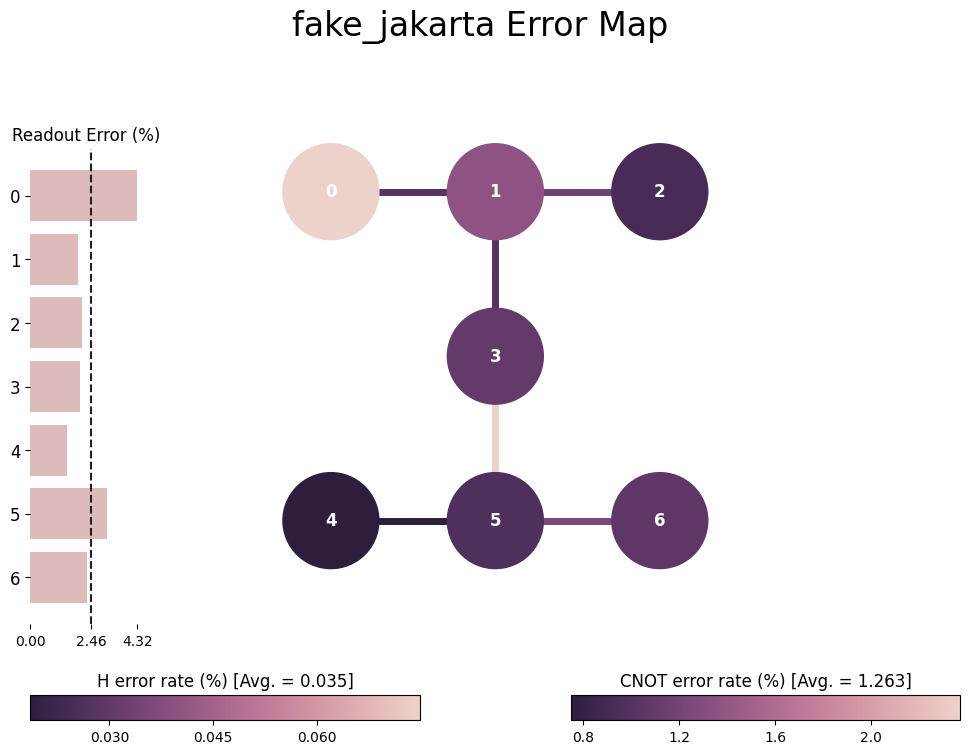

In [42]:
plot_error_map(backend)

In [49]:
layout = [2,1,3,5,4]

In [50]:
output_all = []
qc_trans_all = []
prob_all = []

worst = 1
best = 0
i=0
for input1 in ['0','1']:
    for input2 in ['0','1']:
        for input3 in ['0', '1']:
            qc_trans, output = x_AND_y_OR_z(input1, input2, input3, backend, layout)

            output_all.append(output)
            qc_trans_all.append(qc_trans)

            prob = output[str(int( (input1=='1' and input2=='1') or input3=='1' ))]/8192
            prob_all.append(prob)

            print('\nProbability of correct answer for inputs',input1,input2,input3)
            print('{:.2f}'.format(prob) )
            print('\nThe circuit depth : {}'.format (qc_trans_all[i].depth()))
            print('# of nonlocal gates : {}'.format (qc_trans_all[i].num_nonlocal_gates()))
            print('---------------------------------')
            i += 1
            worst = min(worst,prob)
            best = max(best, prob)
        
print('')
print('\nThe highest of these probabilities is {:.2f}'.format(best))
print('The lowest of these probabilities is {:.2f}'.format(worst))
print('Maximum difference across the accuracies is {:.2f}'.format(best-worst))

47fc3577-e3eb-4043-b4e9-0f99807ced54
Job Status: job has successfully run

Probability of correct answer for inputs 0 0 0
0.85

The circuit depth : 41
# of nonlocal gates : 28
---------------------------------
f54788da-4c3b-453d-b79a-69a6e29d272f
Job Status: job has successfully run

Probability of correct answer for inputs 0 0 1
0.89

The circuit depth : 42
# of nonlocal gates : 28
---------------------------------
11542ec4-56b8-49b5-88df-901e52669b64
Job Status: job has successfully run

Probability of correct answer for inputs 0 1 0
0.85

The circuit depth : 42
# of nonlocal gates : 28
---------------------------------
dc2ba375-c0dc-4312-aa13-10e0d49c760c
Job Status: job has successfully run

Probability of correct answer for inputs 0 1 1
0.90

The circuit depth : 42
# of nonlocal gates : 28
---------------------------------
0e492225-e0b5-41c8-9a99-80923c542c01
Job Status: job has successfully run

Probability of correct answer for inputs 1 0 0
0.84

The circuit depth : 42
# of nonl